In [1]:
import os
import pretty_midi
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import math
import pandas as pd

In [2]:
data = {}
file = ""
midi = False
for i, (dirpath, dirnames, filenames) in enumerate(os.walk('./data', topdown=False)):
#     print(i, dirpath, dirnames, filenames)
    for f in filenames: #f = name of file, not full file path 
        
        file_path = os.path.join(dirpath, f)
#         print(file_path)
#         print(f)
#         print(f[17:-5])
            
        if "midi" in f:
            file = f[17:-5]
#             print(f)
        data[file] = file_path


In [3]:
data

{'Recital1-3_MID--AUDIO_02_R1_2018_wav--3': './data\\2018\\MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--3.midi',
 'Recital1-3_MID--AUDIO_02_R1_2018_wav--4': './data\\2018\\MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--4.midi',
 'Recital1-3_MID--AUDIO_03_R1_2018_wav--4': './data\\2018\\MIDI-Unprocessed_Recital1-3_MID--AUDIO_03_R1_2018_wav--4.midi'}

In [4]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

In [5]:
mm = [i for i in data.values() if (i[0]!="") and (i[1]!="")]
mm

['./data\\2018\\MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--3.midi',
 './data\\2018\\MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--4.midi',
 './data\\2018\\MIDI-Unprocessed_Recital1-3_MID--AUDIO_03_R1_2018_wav--4.midi']

In [6]:
midi = mm[1]
fs = 2048

print("midi:", midi)


midi: ./data\2018\MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--4.midi


In [7]:
midi_d = pretty_midi.PrettyMIDI(midi)
piano = midi_d.instruments[0].notes #piano specifically
print(piano)

[Note(start=0.795573, end=0.997396, pitch=73, velocity=32), Note(start=1.000000, end=1.071615, pitch=75, velocity=39), Note(start=1.132812, end=1.195312, pitch=73, velocity=34), Note(start=1.205729, end=1.253906, pitch=75, velocity=41), Note(start=1.270833, end=1.337240, pitch=73, velocity=44), Note(start=1.371094, end=1.489583, pitch=75, velocity=42), Note(start=1.424479, end=1.505208, pitch=73, velocity=46), Note(start=1.516927, end=1.626302, pitch=75, velocity=36), Note(start=1.651042, end=1.712240, pitch=75, velocity=44), Note(start=1.708333, end=1.830729, pitch=73, velocity=25), Note(start=1.815104, end=1.861979, pitch=75, velocity=47), Note(start=1.856771, end=1.927083, pitch=73, velocity=39), Note(start=1.962240, end=2.000000, pitch=75, velocity=40), Note(start=2.016927, end=2.070312, pitch=73, velocity=50), Note(start=2.115885, end=2.164062, pitch=75, velocity=36), Note(start=2.157552, end=2.209635, pitch=73, velocity=55), Note(start=2.240885, end=2.282552, pitch=75, velocity=4

D:\apps\Anaconda\lib\site-packages\librosa\display.py:1155: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  "Frequency axis exceeds Nyquist. "


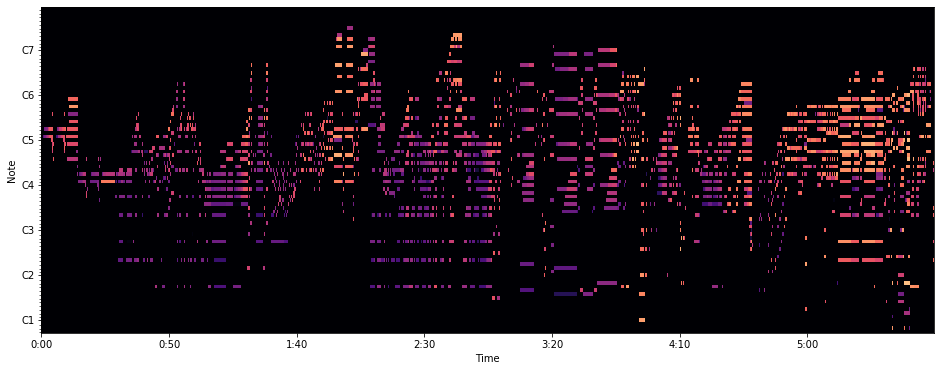

In [8]:
plt.figure(figsize=(16,6))
plot_piano_roll(midi_d, 21, 108)

In [9]:
offset = 20
#since first note (A0) on piano corresponds with 21 MIDI pitch
#thus 21 MIDI pitch corresp. to 1, as in the first key on piano

highest_pitch = piano[0].pitch
lowest_pitch = piano[0].pitch
num_notes = 0

norm_pitch = []
start_times = []
end_times = []

for note in midi_d.instruments[0].notes:
    p = note.pitch
    norm_pitch.append(p-offset)
    if p < lowest_pitch:
        lowest_pitch = p
    elif p > highest_pitch:
        highest_pitch = p
    start_times.append(note.start)
    end_times.append(note.end)
    num_notes = num_notes + 1
        
print("Number Notes (Nondistinct): ",num_notes)
print("Start Pitch: ", highest_pitch)
print("End Pitch: ", lowest_pitch)
print("Offset Note Pitches:",norm_pitch)
print()
print(np.array(start_times).shape, "; Start times:", start_times)
print("End times:",end_times)


Number Notes (Nondistinct):  4740
Start Pitch:  105
End Pitch:  21
Offset Note Pitches: [53, 55, 53, 55, 53, 55, 53, 55, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 52, 51, 55, 50, 59, 49, 53, 48, 57, 47, 51, 55, 59, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 55, 53, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 52, 51, 55, 59, 50, 49, 53, 48, 57, 47, 51, 55, 59, 53, 55, 53, 47, 51, 55, 53, 55, 53, 55, 53, 55, 53, 59, 55, 53, 63, 55, 55, 53, 53, 55, 53, 57, 55, 53, 55, 61, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 55, 53, 63, 55, 59, 53, 55, 53, 55, 53, 55, 61, 57, 53, 51, 49, 47, 45, 43, 41, 43, 41, 43, 41, 43, 41, 43, 41, 43, 43, 43, 41, 43, 41, 43, 41, 43, 41, 43, 41, 43, 41, 43, 41, 43, 41, 43, 41, 43, 41, 43, 41, 40, 39, 43, 47, 38, 37, 41, 36, 45, 35, 39, 43, 47, 41, 43, 41, 43, 41, 43, 41, 43, 41, 43, 43, 41, 43, 41, 43, 41, 41, 43, 41,

In [10]:
song_length = midi_d.get_end_time() #length of song in sec
print("Total length (s):", song_length)
#number of samples in the entire song
frames = math.ceil(song_length * fs) #fs (sampling freq) is samples per second
print("Total frames:", frames)

n_range = 88 #21 - 108 for MIDI pitches, 1-88 normalized

start_winds = []
end_winds = []
stride = 1 #number samples btwn windows.  Assuming 1?
for f in range(num_notes):
    start_winds.append(int(round(fs*start_times[f]/stride)))
    end_winds.append(int(round(fs*end_times[f]/stride))) #makes sure these are ints
print("Start frames:", start_winds)
print("End frames:", end_winds)
print("Length start times:", len(start_times))
print("Length total notes:",num_notes)

Total length (s): 349.68619791666663
Total frames: 716158
Start frames: [1629, 2048, 2320, 2469, 2603, 2808, 2917, 3107, 3381, 3499, 3717, 3803, 4019, 4131, 4333, 4419, 4589, 4709, 4907, 4997, 5216, 5309, 5488, 5613, 5773, 5888, 6053, 6189, 6347, 6469, 6581, 6731, 6851, 6995, 7160, 7307, 7451, 7616, 7755, 7941, 7947, 8061, 8301, 8613, 8797, 9120, 8971, 9264, 9435, 9683, 9573, 9824, 9995, 10136, 10264, 12397, 12891, 12997, 13184, 13373, 13771, 13901, 14075, 14187, 14339, 14469, 14587, 14736, 14869, 14971, 15147, 15288, 15459, 15731, 15581, 15843, 15995, 16128, 16275, 16413, 16552, 16704, 16845, 16984, 17112, 17248, 17421, 17523, 17651, 17773, 17947, 18160, 18320, 18456, 18613, 18747, 18904, 19144, 19053, 19259, 19456, 19603, 19723, 20363, 20744, 20912, 20984, 20979, 21045, 21208, 21352, 21472, 21640, 21768, 21931, 22075, 22003, 22251, 22349, 21896, 22576, 22949, 22757, 23096, 23227, 23357, 22608, 23547, 23669, 23803, 22565, 23917, 24120, 24211, 24376, 24499, 24637, 24792, 24981, 25152, 

In [11]:
onehot = np.zeros((88,frames)) #rows, then cols

for i in range(1,89):
    for j in range(num_notes): #0 to nn-1; issue here is that num_notes is non-distinct 
        if(norm_pitch[j] == i):
            #s= start_winds[j]-1
            #e = end_winds[j]
            for col in range(start_winds[j]-1,end_winds[j]):
                onehot[i,col]=1
        
print(onehot.shape)
print("one hot:", onehot)

(88, 716158)
one hot: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


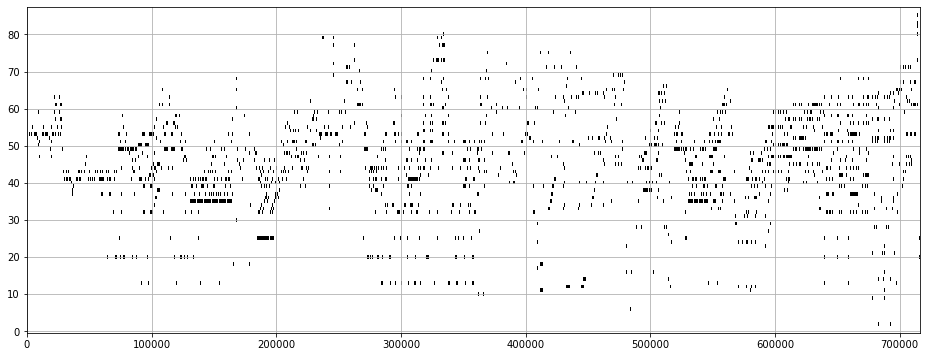

In [12]:
plt.figure(figsize=(16,6))
plt.imshow(onehot, aspect = 'auto', origin = 'lower')
plt.set_cmap('gray_r')
plt.grid(True)

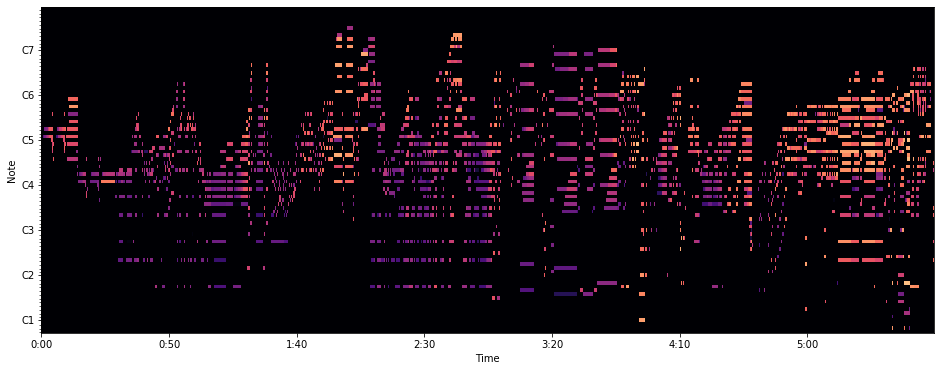

In [13]:
plt.figure(figsize=(16,6))
plot_piano_roll(midi_d, 21, 108)

In [14]:
def one_hot_encode(midi_file, sr, stride):
    
    # MIDI files represent a note's pitch with an integer value between 0 and 127
    # (https://www.inspiredacoustics.com/en/MIDI_note_numbers_and_center_frequencies)
    # But on an 88 key piano these pitches only range from 21-108 inclusive
    # (http://newt.phys.unsw.edu.au/jw/notes.html)
    # so at every sample we want a vector with 88 elements. Moreover, if note.pitch==21
    # we want this to be the 0-th element in our vector 88 so we subtract 21 from every 
    # pitch
    # Reference: https://raphaellederman.github.io/articles/musicgeneration/#collecting-data
    
    offset = 21
    num_keys = 88 #number of keys on the piano
    
    #get list of note objects from MIDI file
    midi_data = pretty_midi.PrettyMIDI(midi_file)
    notes = [note for note in midi_data.instruments[0].notes]
    
    #time in seconds where this MIDI file ends
    song_length = midi_data.get_end_time()
    
    #number of samples in the entire song
    n_samples = math.ceil(song_length * sr/stride)
    
    #initialize one-hot-encoded array
    X_ohe = np.zeros((num_keys, n_samples))
    
    
    start_windows = []
    end_windows = []
    norm_pitches = []
    totNotes = 0
    
    for note in notes:
        norm_pitches.append(note.pitch-20)
        start_windows.append(int(round(note.start*sr/stride)))
        end_windows.append(int(round(note.end*sr/stride)))
        totNotes = totNotes + 1

    
    for i in range(totNotes): #0 to nn-1
        for col in range(start_windows[i]-1,end_windows[i]):
            X_ohe[norm_pitches[i], col]=1
                      
    return X_ohe

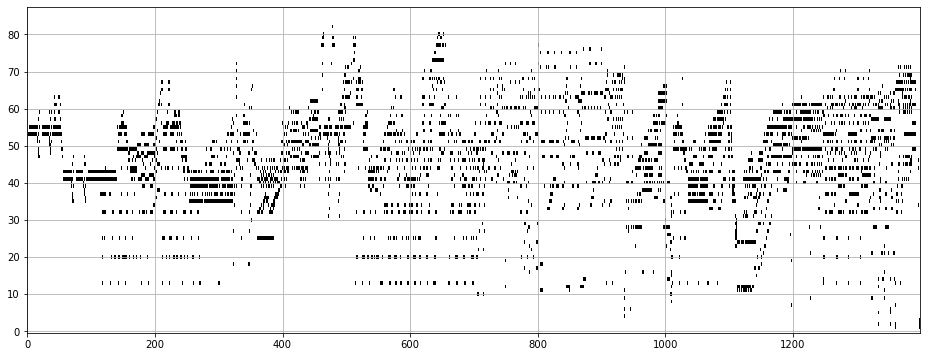

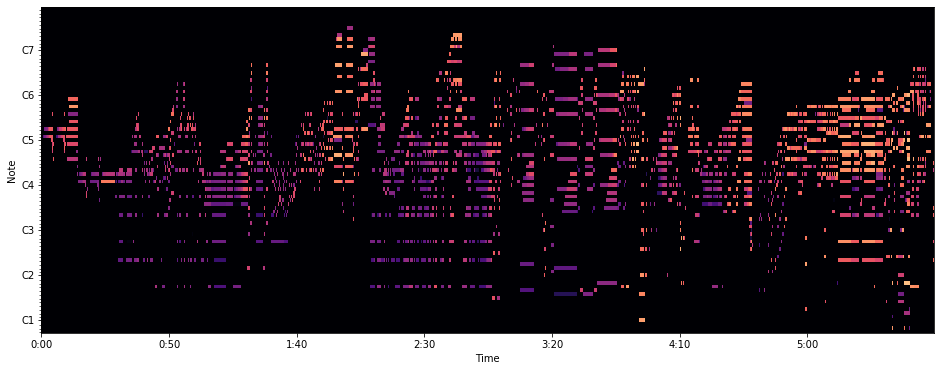

In [15]:
x = one_hot_encode(midi, 4, 1)
#print(pd.DataFrame(x))
plt.figure(figsize=(16,6))
plt.imshow(x, aspect = 'auto', origin = 'lower')
plt.set_cmap('gray_r')
plt.grid(True)

plt.figure(figsize=(16,6))
plot_piano_roll(midi_d, 21, 108)

#x2 = one_hot_encode2(midi, fs)
#print(pd.DataFrame(x))
#plt.figure(figsize=(16,6))
#plt.imshow(x2, aspect = 'auto', origin = 'lower')
#plt.set_cmap('hot')
#plt.grid(True)

In [16]:
#Checking note durations b/c graphs do not align
#Specifically focus on the area around 8:30 - end

sr = 1
#Note ranges from c4-c7 aka normalized 40-76
#Time in sec from 510 s to end

s = 500*sr
#e= 255*sr

x = one_hot_encode(midi, sr, 1)

print(x[40:75, s:])

#Correct; manually checked with initial data, assuming sr=1.

[]


In [17]:
y = one_hot_encode(midi, 4, 1)

In [18]:
y.shape

(88, 1399)

In [19]:
mm

['./data\\2018\\MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--3.midi',
 './data\\2018\\MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--4.midi',
 './data\\2018\\MIDI-Unprocessed_Recital1-3_MID--AUDIO_03_R1_2018_wav--4.midi']

In [20]:
piano_list = []
for m in mm:
    midi = m
    midi_d = pretty_midi.PrettyMIDI(midi)
    piano = midi_d.instruments[0].notes #piano specifically
    piano_list.append(piano)
    print(piano)

[Note(start=0.992188, end=1.277344, pitch=70, velocity=43), Note(start=0.955729, end=1.294271, pitch=73, velocity=62), Note(start=1.006510, end=1.319010, pitch=65, velocity=34), Note(start=2.006510, end=2.268229, pitch=59, velocity=38), Note(start=1.970052, end=2.311198, pitch=63, velocity=57), Note(start=1.942708, end=2.335938, pitch=67, velocity=66), Note(start=2.834635, end=3.229167, pitch=62, velocity=33), Note(start=2.805990, end=3.260417, pitch=70, velocity=57), Note(start=2.837240, end=3.290365, pitch=66, velocity=45), Note(start=4.013021, end=4.588542, pitch=55, velocity=34), Note(start=3.988281, end=4.699219, pitch=65, velocity=41), Note(start=4.669271, end=4.901042, pitch=27, velocity=29), Note(start=4.016927, end=4.959635, pitch=61, velocity=36), Note(start=4.975260, end=5.061198, pitch=39, velocity=28), Note(start=5.290365, end=5.658854, pitch=46, velocity=45), Note(start=5.546875, end=5.777344, pitch=49, velocity=37), Note(start=5.722656, end=5.787760, pitch=53, velocity=4

[Note(start=0.795573, end=0.997396, pitch=73, velocity=32), Note(start=1.000000, end=1.071615, pitch=75, velocity=39), Note(start=1.132812, end=1.195312, pitch=73, velocity=34), Note(start=1.205729, end=1.253906, pitch=75, velocity=41), Note(start=1.270833, end=1.337240, pitch=73, velocity=44), Note(start=1.371094, end=1.489583, pitch=75, velocity=42), Note(start=1.424479, end=1.505208, pitch=73, velocity=46), Note(start=1.516927, end=1.626302, pitch=75, velocity=36), Note(start=1.651042, end=1.712240, pitch=75, velocity=44), Note(start=1.708333, end=1.830729, pitch=73, velocity=25), Note(start=1.815104, end=1.861979, pitch=75, velocity=47), Note(start=1.856771, end=1.927083, pitch=73, velocity=39), Note(start=1.962240, end=2.000000, pitch=75, velocity=40), Note(start=2.016927, end=2.070312, pitch=73, velocity=50), Note(start=2.115885, end=2.164062, pitch=75, velocity=36), Note(start=2.157552, end=2.209635, pitch=73, velocity=55), Note(start=2.240885, end=2.282552, pitch=75, velocity=4

In [21]:
piano_list

[[Note(start=0.992188, end=1.277344, pitch=70, velocity=43),
  Note(start=0.955729, end=1.294271, pitch=73, velocity=62),
  Note(start=1.006510, end=1.319010, pitch=65, velocity=34),
  Note(start=2.006510, end=2.268229, pitch=59, velocity=38),
  Note(start=1.970052, end=2.311198, pitch=63, velocity=57),
  Note(start=1.942708, end=2.335938, pitch=67, velocity=66),
  Note(start=2.834635, end=3.229167, pitch=62, velocity=33),
  Note(start=2.805990, end=3.260417, pitch=70, velocity=57),
  Note(start=2.837240, end=3.290365, pitch=66, velocity=45),
  Note(start=4.013021, end=4.588542, pitch=55, velocity=34),
  Note(start=3.988281, end=4.699219, pitch=65, velocity=41),
  Note(start=4.669271, end=4.901042, pitch=27, velocity=29),
  Note(start=4.016927, end=4.959635, pitch=61, velocity=36),
  Note(start=4.975260, end=5.061198, pitch=39, velocity=28),
  Note(start=5.290365, end=5.658854, pitch=46, velocity=45),
  Note(start=5.546875, end=5.777344, pitch=49, velocity=37),
  Note(start=5.722656, e

In [22]:
one_hot_list = []
for m in mm:
    print(m)
    offset = 20
    midi = m
    midi_d = pretty_midi.PrettyMIDI(midi)
    piano = midi_d.instruments[0].notes #piano specifically
    piano_list.append(piano)
    #since first note (A0) on piano corresponds with 21 MIDI pitch
    #thus 21 MIDI pitch corresp. to 1, as in the first key on piano

    highest_pitch = piano[0].pitch
    lowest_pitch = piano[0].pitch
    num_notes = 0

    norm_pitch = []
    start_times = []
    end_times = []

    for note in piano:
        p = note.pitch
        norm_pitch.append(p-offset)
        if p < lowest_pitch:
            lowest_pitch = p
        elif p > highest_pitch:
            highest_pitch = p
        start_times.append(note.start)
        end_times.append(note.end)
        num_notes = num_notes + 1

    # print("Number Notes (Nondistinct): ",num_notes)
    # print("Start Pitch: ", highest_pitch)
    # print("End Pitch: ", lowest_pitch)
    # print("Offset Note Pitches:",norm_pitch)
    # print()
    # print(np.array(start_times).shape, "; Start times:", start_times)
    # print("End times:",end_times)
    # print("Length total notes:",num_notes)
    onehot = np.zeros((100,frames)) #rows, then cols

    for i in range(1,101):
        for j in range(num_notes): #0 to nn-1; issue here is that num_notes is non-distinct 
            if(norm_pitch[j] == i):
                #s= start_winds[j]-1
                #e = end_winds[j]
                for col in range(start_winds[j]-1,end_winds[j]):
                    onehot[i,col]=1

#     print(onehot.shape)
#     print("one hot:", onehot)
    one_hot_list.append(onehot)

./data\2018\MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--3.midi
./data\2018\MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--4.midi
./data\2018\MIDI-Unprocessed_Recital1-3_MID--AUDIO_03_R1_2018_wav--4.midi


In [23]:
len(one_hot_list)

3

In [24]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import BatchNormalization as BatchNorm
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

In [25]:
### Hyperparameter setting and optimization ###

# Optimization parameters:
num_training_iterations = 20  # Increase this to train longer
batch_size = 4  # Experiment between 1 and 64
seq_length = 100  # Experiment between 50 and 500
learning_rate = 5e-3  # Experiment between 1e-5 and 1e-1

# Model parameters: 
# vocab_size = len(vocab)
embedding_dim = 256 
rnn_units = 1024  # Experiment between 1 and 2048

# Checkpoint location: 
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "my_ckpt")

In [26]:
model = Sequential()
model.add(LSTM(
    rnn_units, 
    return_sequences=True, 
    recurrent_initializer='glorot_uniform',
    recurrent_activation='sigmoid',
    stateful=True,
))
model.add(Dense(100))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [31]:
filepath = "weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"    
checkpoint = ModelCheckpoint(
    filepath, monitor='loss', 
    verbose=0,        
    save_best_only=True,        
    mode='min'
)    
callbacks_list = [checkpoint]
model.fit(one_hot_list, epochs=200, batch_size=64, callbacks=callbacks_list)

Epoch 1/200


ValueError: in user code:

    D:\apps\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    D:\apps\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\apps\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\apps\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\apps\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\apps\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    D:\apps\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    D:\apps\Anaconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    D:\apps\Anaconda\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:207 assert_input_compatibility
        ' input tensors. Inputs received: ' + str(inputs))

    ValueError: Layer sequential expects 1 input(s), but it received 3 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 716158) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 716158) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(None, 716158) dtype=float32>]


In [ ]:
model.summary()